<>:6: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:6: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:9: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:10: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:6: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:6: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:9: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:10: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
C:\Users\Kote\AppData\Local\Temp\ipykernel_32868\2695039489.py:6: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  return np.sin**2(x / 2.0) * np.cos**2(y / 2.0)
C:\Users\Kote\AppData\Local\Temp\ipykernel_32868\2695039489.py:6: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  return np.sin**2(x / 2.0) * np.cos**2

TypeError: 'int' object is not callable

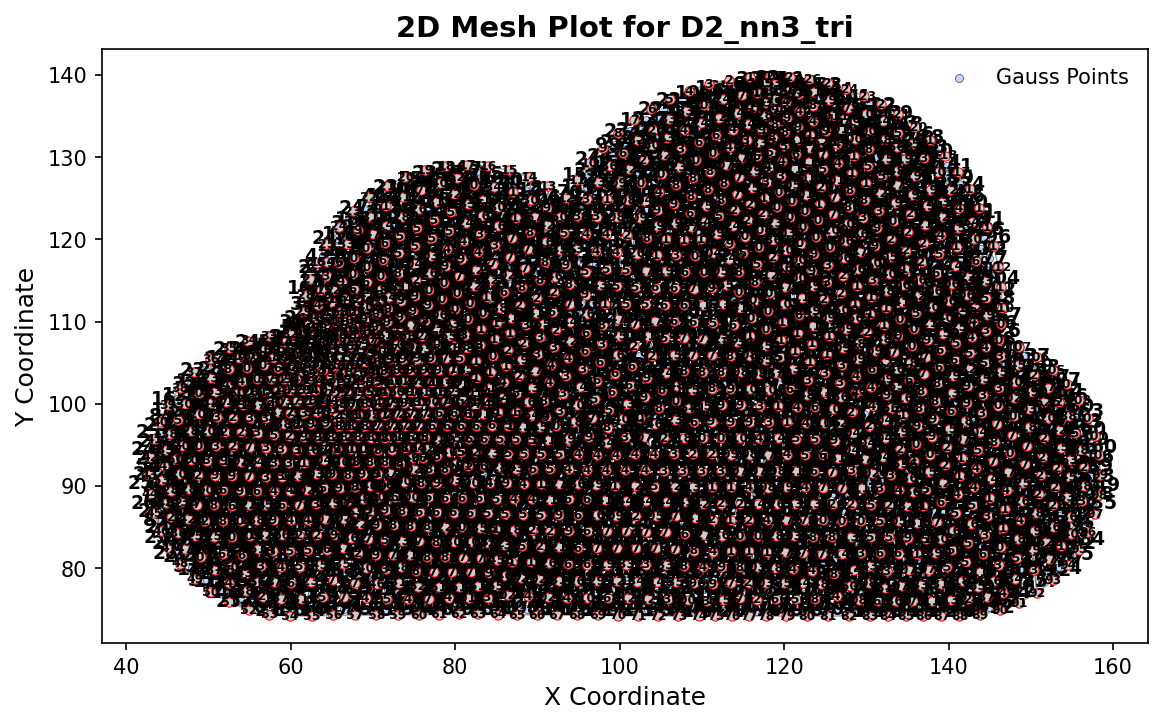

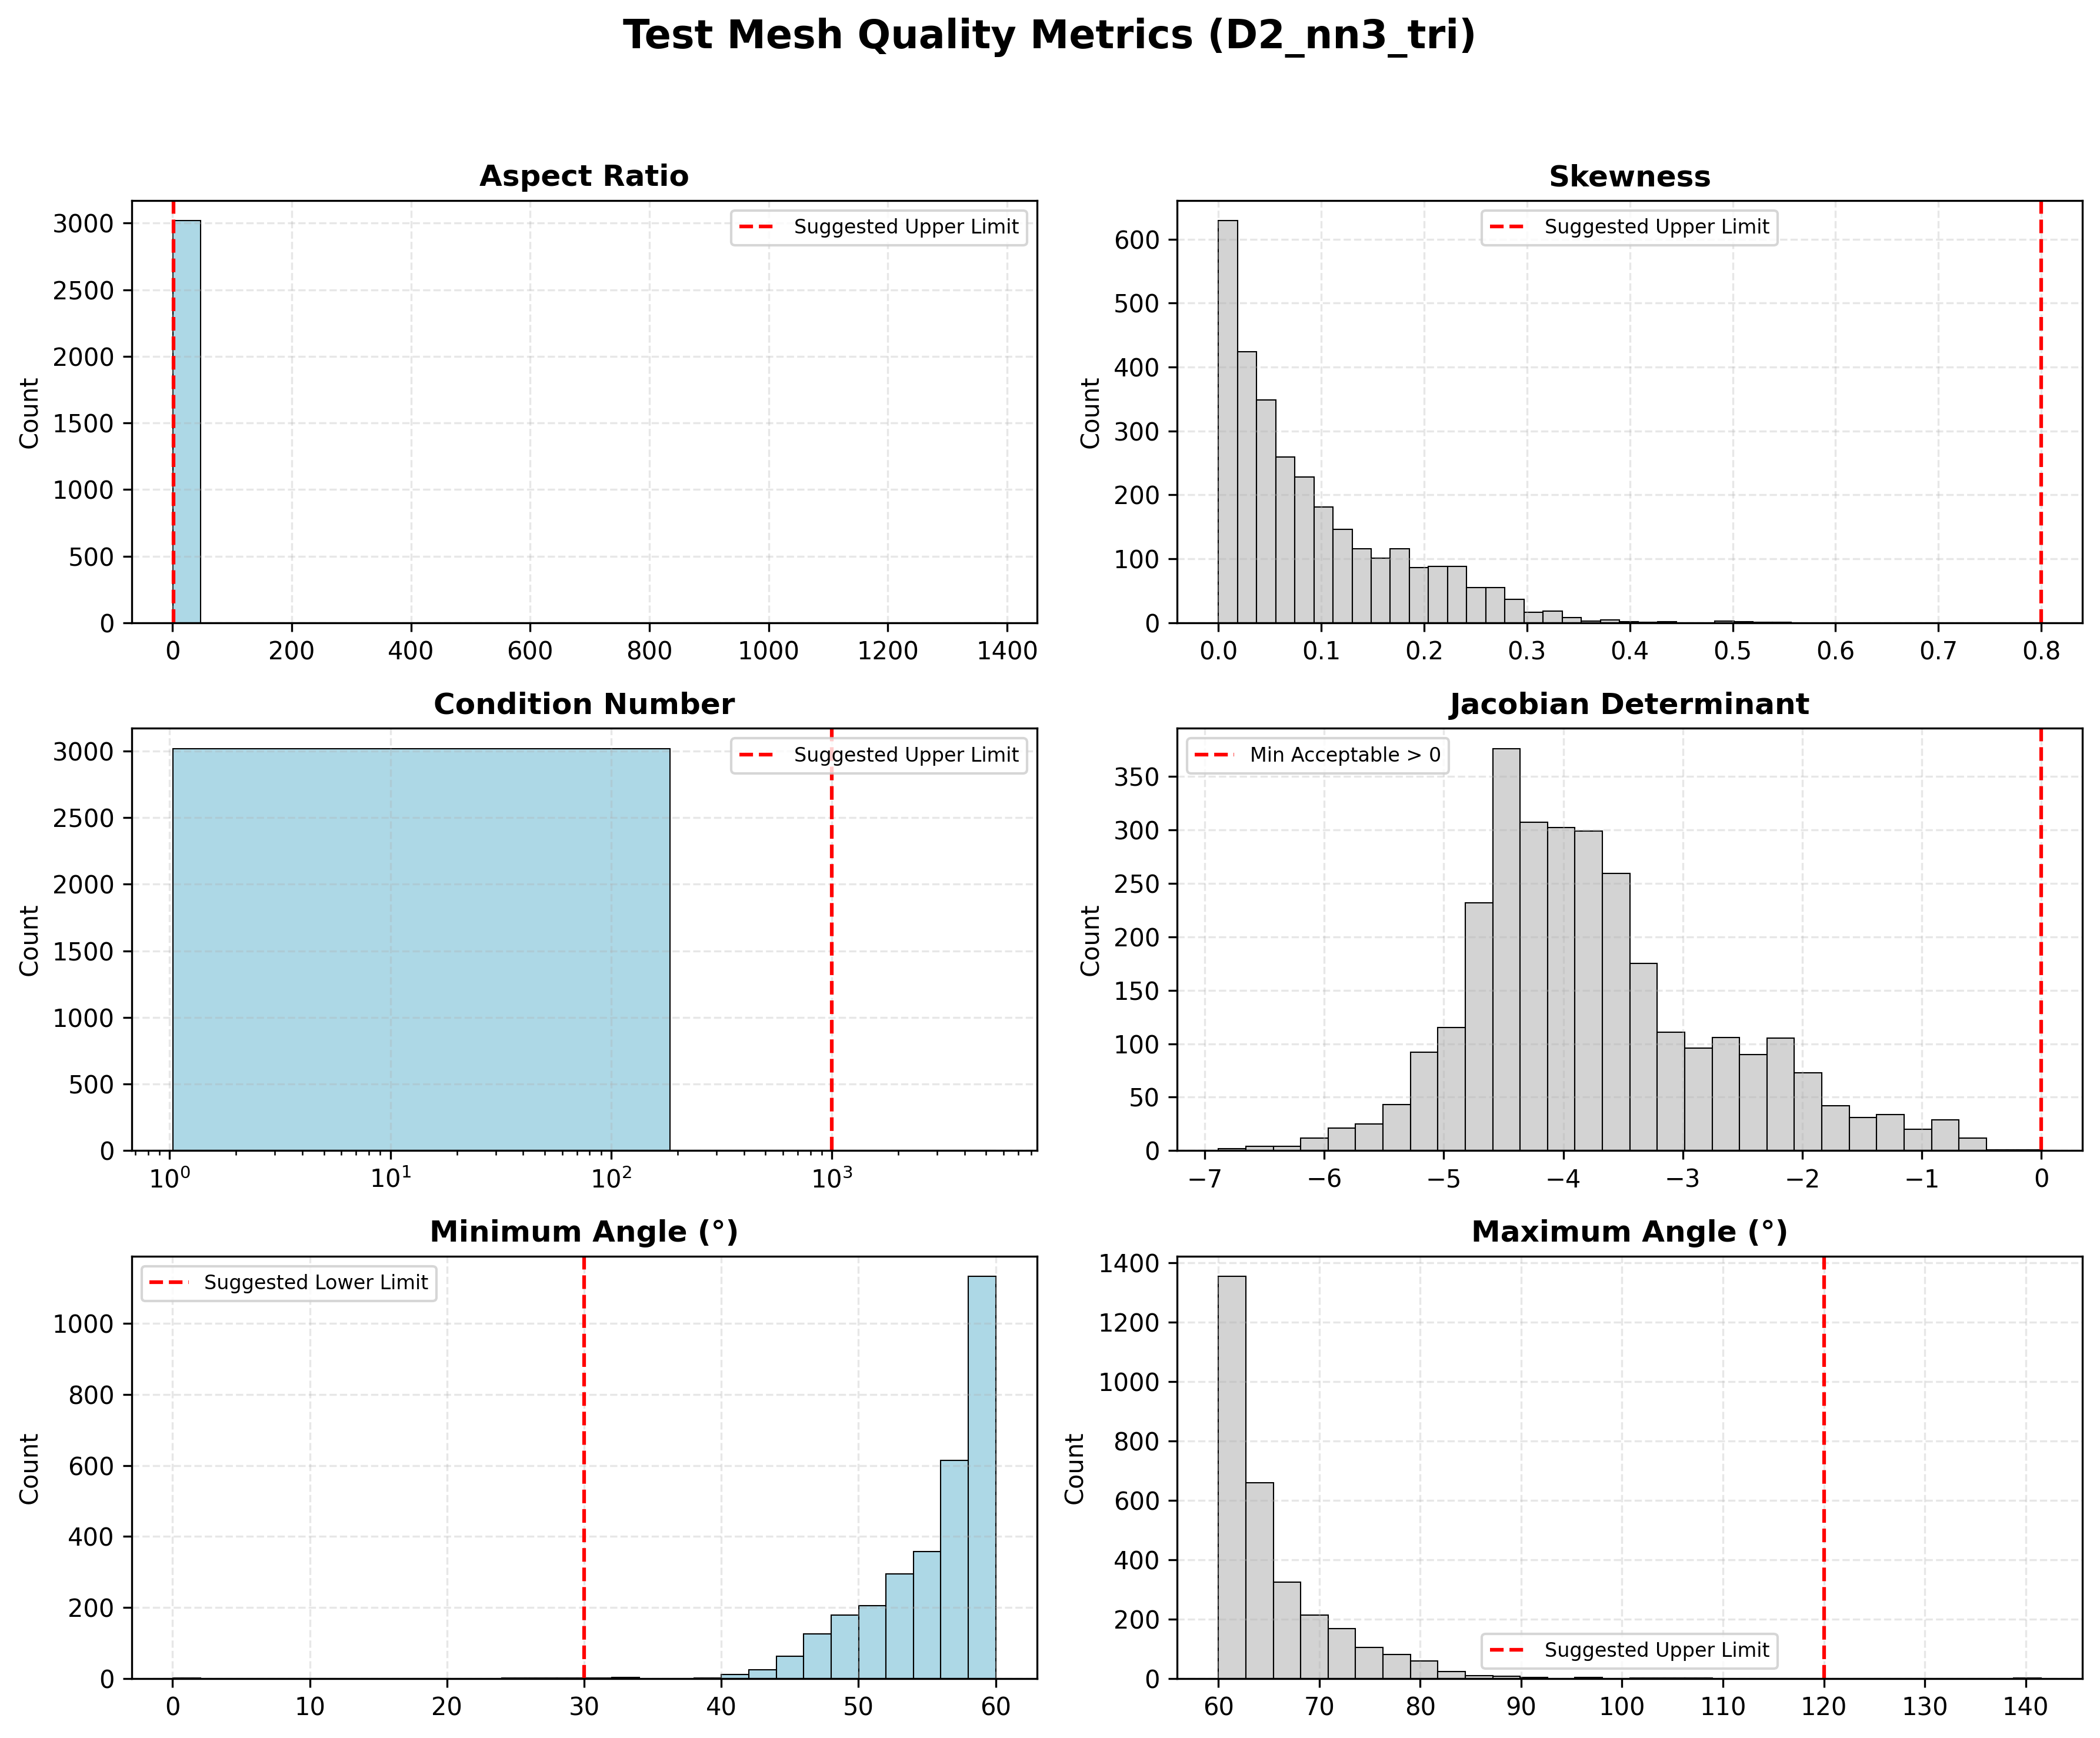

In [ ]:
from finiteelementanalysis import pre_process as pre
from finiteelementanalysis import pre_process_demo_helper_fcns as pre_demo
import numpy as np

def fcn_interp_1(x, y):
    return np.sin(x / 2.0)**2 * np.cos(y / 2.0)**2

def fcn_interp_deriv_1(x, y):
    df_dx = np.sin(x / 2.0) * np.cos(x / 2.0) * np.cos(y / 2.0)**2
    df_dy = -np.sin(x / 2.0)**2 * np.sin(y / 2.0) * np.cos(y / 2.0)
    return np.array([df_dx, df_dy])

# Create mesh
ele_type = "D2_nn3_tri"
num_gauss_pts = 1
mesh_name = f"Cloud_Mesh_{ele_type}_gp{num_gauss_pts}"
complex_outline = pre.get_cloud_outline()
mesh_size = 10.0
coords, connect = pre.mesh_outline(complex_outline, ele_type, mesh_name, mesh_size)
mesh_gauss_pts = pre_demo.get_all_mesh_gauss_pts(ele_type, num_gauss_pts, coords, connect)

# Plot mesh
pre_demo.plot_mesh_2D(mesh_name, ele_type, coords, connect, mesh_gauss_pts)

# Create element quality historams
aspect_ratios, skewness, min_angles, max_angles = pre_demo.compute_element_quality_metrics(ele_type, coords, connect)
cond_nums, jac_dets = pre_demo.compute_condition_and_jacobian(ele_type, coords, connect)
plot_file = mesh_name + "_histograms"
pre_demo.plot_element_quality_histograms(
        fname=str(plot_file),
        super_title="Test Mesh Quality Metrics (%s)" % (ele_type),
        ele_type=ele_type,
        cond_nums=cond_nums,
        jac_dets=jac_dets,
        aspect_ratios=aspect_ratios,
        skewness=skewness,
        min_angles=min_angles,
        max_angles=max_angles
    )

# Example interpolation w/ error plots
ground_truth_fcn = fcn_interp_1(mesh_gauss_pts[..., 0], mesh_gauss_pts[..., 1])  # Vectorized evaluation
interpolated = pre_demo.interpolate_scalar_to_gauss_pts(ele_type, num_gauss_pts, fcn_interp_1, coords, connect)
error_plot = mesh_name + "_fcn_errors"
pre_demo.plot_interpolation_with_error(
        str(error_plot),
        ele_type,
        coords,
        connect,
        mesh_gauss_pts,
        interpolated,
        ground_truth_fcn
    )

# Example interpolation of derivatives w/ error plots
ground_truth_grad = np.zeros_like(mesh_gauss_pts)
for kk in range(mesh_gauss_pts.shape[0]):
    for jj in range(mesh_gauss_pts.shape[1]):
        x = mesh_gauss_pts[kk, jj, 0]
        y = mesh_gauss_pts[kk, jj, 1]
        ground_truth_grad[kk, jj] = fcn_interp_deriv_1(x, y)  # should return [∂f/∂x, ∂f/∂y]

# Compute interpolated gradient from nodal values of fcn_3
interpolated_grad = pre_demo.interpolate_scalar_deriv_to_gauss_pts(
    ele_type,
    num_gauss_pts,
    fcn_interp_1,
    coords,
    connect
)

# Save gradient interpolation error plot
grad_error_plot = mesh_name + "_fcn_grad_errors"
pre_demo.plot_interpolation_gradient_with_error(
    str(grad_error_plot),
    ele_type,
    coords,
    connect,
    mesh_gauss_pts,
    interpolated_grad,
    ground_truth_grad
)

